In [1]:
import pandas as pd

# 날짜 컬럼 방지
def read_csv_auto_dates(path):
    # 1) 전체 파일을 먼저 읽기
    temp = pd.read_csv(path, low_memory=False)
    
    # 2) _at 로 끝나는 컬럼 자동 탐지
    date_cols = [col for col in temp.columns if col.endswith('_at')]
    
    # 3) 다시 날짜 컬럼을 datetime 으로 읽기
    return pd.read_csv(path, parse_dates=date_cols, low_memory=False)

# Load Files (전처리)
Acquisitions = read_csv_auto_dates("./clean_data_v1/clean_acquisitions_final.csv")
Degrees = read_csv_auto_dates("./clean_data_v1/clean_degrees_final.csv")
FundingRounds = read_csv_auto_dates("./clean_data_v1/clean_fr_final.csv")
Funds = read_csv_auto_dates("./clean_data_v1/clean_funds_final.csv")
Investments = read_csv_auto_dates("./clean_data_v1/clean_investments_final.csv")
Ipos = read_csv_auto_dates("./clean_data_v1/clean_ipos_final.csv")
Milestones = read_csv_auto_dates("./clean_data_v1/clean_milestones_final.csv")
Objects = read_csv_auto_dates("./clean_data_v1/clean_objects_final.csv")
People = read_csv_auto_dates("./clean_data_v1/clean_people_final.csv")
Offices = read_csv_auto_dates("./clean_data_v1/clean_offices_final.csv")
Relationships = read_csv_auto_dates("./clean_data_v1/clean_relationships_final.csv")

# Load Files (작업용 전처리)
company = read_csv_auto_dates("./entity_type/objects_company.csv")
finorg = read_csv_auto_dates("./entity_type/objects_finorg.csv")
person = read_csv_auto_dates("./entity_type/objects_person.csv")
product = read_csv_auto_dates("./entity_type/objects_product.csv")

# Load Files (join)
acqusitions_company = read_csv_auto_dates("./EDA's join/acqusitions_company.csv")
fr_company = read_csv_auto_dates("./EDA's join/fr_company.csv")
ipos_company = read_csv_auto_dates("./EDA's join/ipos_company.csv")
startup_system = read_csv_auto_dates("./EDA's join/startup_system.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


In [2]:
# ! pip install squarify

In [3]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


# 한글 안깨지게 맥북용
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)

## 전체 시장 개관

### 1. 산업별 투자 동향 분석
- 산업별 투자 건수
- 산업별 총 투자액
- 산업별 성공(ipo, acqusition) 스타트업 분포
    * 상장된 스타트업
    * 인수된 스타트업
- 연도별 산업 트렌드 변화

In [43]:
# 산업별 투자 건수 
industry_invest_cnt = (startup_system.groupby('obj_category_filled')['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False))

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13298/954965310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_invest_cnt, x='funding_round_id', y='obj_category_filled', palette='pastel')


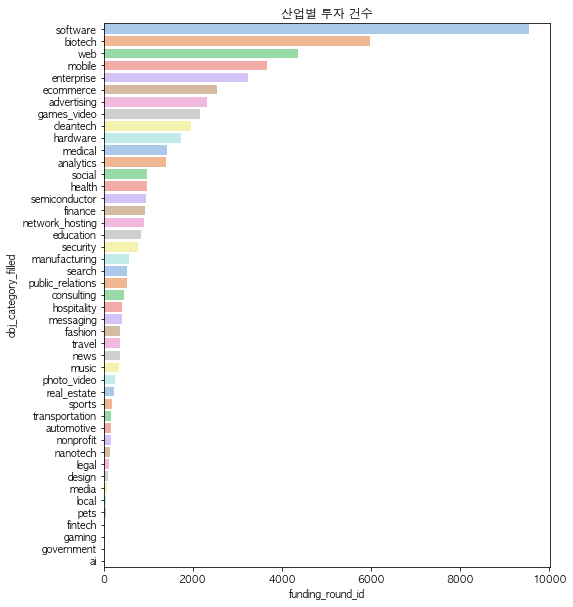

In [44]:
# 산업별 투자 건수 수평 막대 그래프
plt.figure(figsize=(8, 10))
sns.barplot(data=industry_invest_cnt, x='funding_round_id', y='obj_category_filled', palette='pastel')
plt.title('산업별 투자 건수')
plt.show()

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13298/4009505006.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_total_amount, x='raised_amount_usd', y='obj_category_filled', palette='pastel')


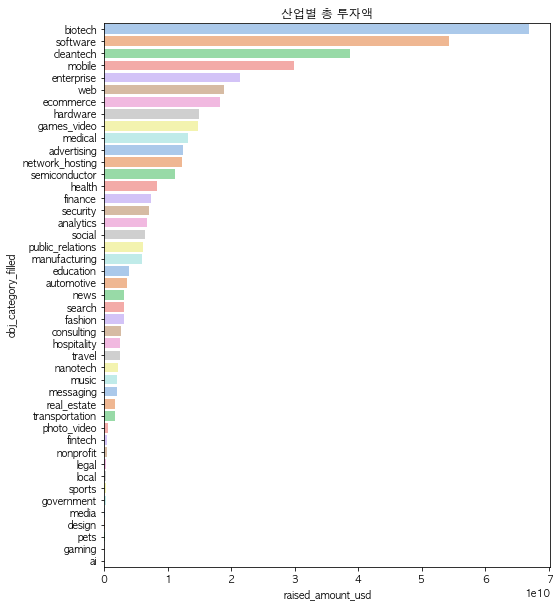

In [45]:
# 산업별 총 투자액
industry_total_amount = (startup_system.groupby('obj_category_filled')['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False))

# 산업별 총 투자액 수평 막대 그래프

plt.figure(figsize=(8, 10))
sns.barplot(data=industry_total_amount, x='raised_amount_usd', y='obj_category_filled', palette='pastel')
plt.title('산업별 총 투자액')
plt.show()

In [46]:
# 산업별 성공(ipo, acqusition) 스타트업 분포
industry_success = (company.groupby(['obj_category_filled', 'status'])['objects_cfpr_id']
                       .count().reset_index())
industry_success

,obj_category_filled,status,objects_cfpr_id
0,advertising,acquired,312
1,advertising,closed,95
2,advertising,ipo,24
3,advertising,operating,5667
4,ai,acquired,1
...,...,...,...
160,travel,operating,902
161,web,acquired,971
162,web,closed,611
163,web,ipo,47


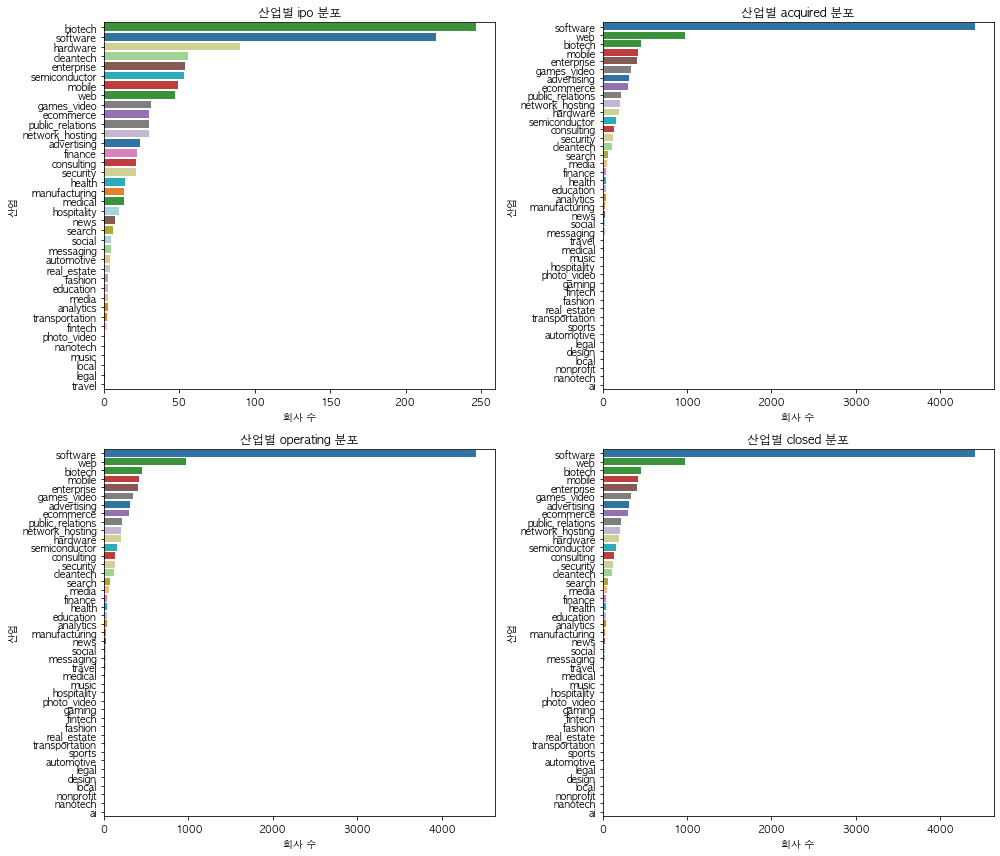

In [47]:
# status 차트 모음
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 색 지정
# 1) 전체 산업 리스트
categories = industry_success['obj_category_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(categories))

# 3) obj_category_filled → color 매핑 딕셔너리
cat_palette = dict(zip(categories, base_colors))

# ----------------------------
# 산업별 ipo 분포
# ipo 만 필터
ipo_df = industry_success[industry_success['status'] == 'ipo'].sort_values('objects_cfpr_id', ascending=False)

# ipo 수평 바 그래프
sns.barplot(data=ipo_df, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[0,0], legend=False)
axes[0,0].set_title('산업별 ipo 분포')
axes[0,0].set_xlabel('회사 수')
axes[0,0].set_ylabel('산업')

# ----------------------------
# 산업별 acquired 분포
# acquired 만 필터
acquired_df = industry_success[industry_success['status'] == 'acquired'].sort_values('objects_cfpr_id', ascending=False)

# acquired 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[0,1])
axes[0,1].set_title('산업별 acquired 분포')
axes[0,1].set_xlabel('회사 수')
axes[0,1].set_ylabel('산업')

# ----------------------------
# 산업별 operating 분포
# operating 만 필터
operationg_df = industry_success[industry_success['status'] == 'operating'].sort_values('objects_cfpr_id', ascending=False)

# operating 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[1,0])
axes[1,0].set_title('산업별 operating 분포')
axes[1,0].set_xlabel('회사 수')
axes[1,0].set_ylabel('산업')

# ----------------------------
# 산업별 closed 분포
# closed 만 필터
operationg_df = industry_success[industry_success['status'] == 'closed'].sort_values('objects_cfpr_id', ascending=False)

# closed 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_category_filled', palette=cat_palette, hue='obj_category_filled', ax=axes[1,1])
axes[1,1].set_title('산업별 closed 분포')
axes[1,1].set_xlabel('회사 수')
axes[1,1].set_ylabel('산업')

plt.tight_layout()
plt.show()


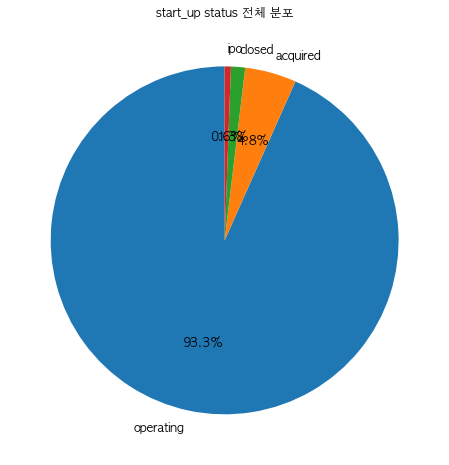

In [11]:
# 전체 분포 (status)
status_counts = company['status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8), facecolor='white')
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
plt.title('start_up status 전체 분포')
plt.show()

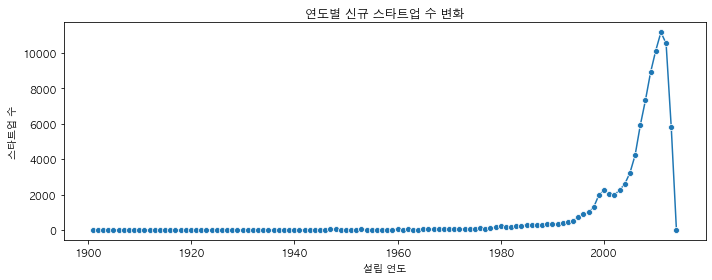

In [48]:
# 연도별 산업 트렌드 변화
company['founded_year'] = pd.to_datetime(company['founded_at'], errors='coerce').dt.year

# 연도, 산업 없는 행은 제거
df_year_ind = (
    company
    .dropna(subset=['founded_year', 'obj_category_filled'])
    .groupby(['founded_year', 'obj_category_filled'])['objects_cfpr_id']
    .nunique()   
    .reset_index(name='new_startups')
)

year_trend = (
    df_year_ind
    .groupby('founded_year')['new_startups']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 4))
sns.lineplot(data=year_trend, x='founded_year', y='new_startups', marker='o')
plt.title('연도별 신규 스타트업 수 변화')
plt.xlabel('설립 연도')
plt.ylabel('스타트업 수')
plt.tight_layout()
plt.show()


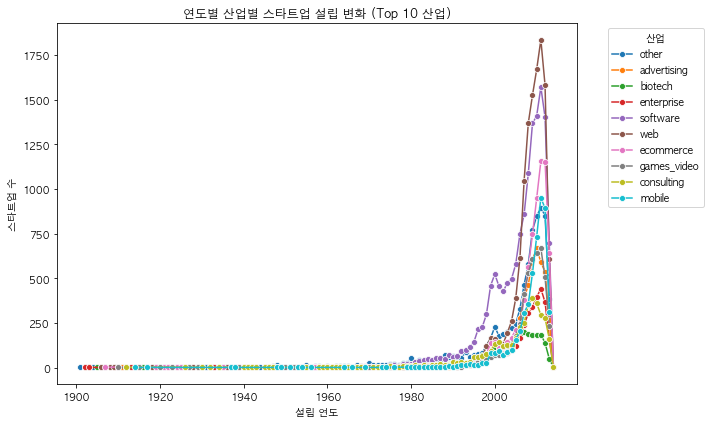

In [13]:
# 전체 기간 기준 상위 10개 산업 선정
top10_ind = (
    df_year_ind.groupby('category_code')['new_startups'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

df_top = df_year_ind[df_year_ind['category_code'].isin(top10_ind)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_top,
    x='founded_year',
    y='new_startups',
    hue='category_code',
    marker='o'
)
plt.title('연도별 산업별 스타트업 설립 변화 (Top 10 산업)')
plt.xlabel('설립 연도')
plt.ylabel('스타트업 수')
plt.legend(title='산업', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


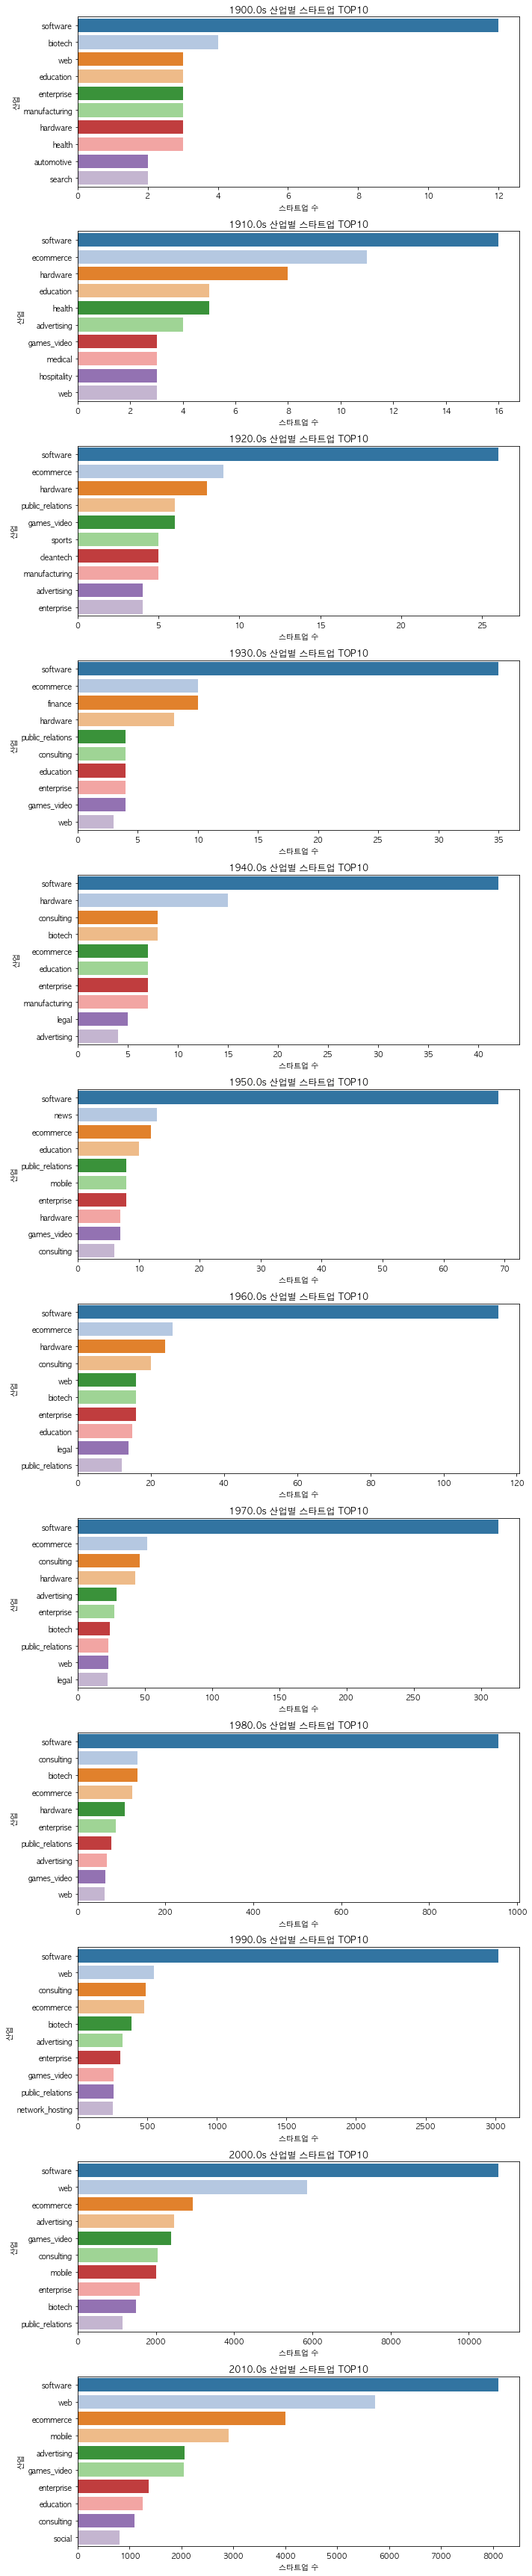

In [49]:
# 연도별 (10년 단위로 끊음)
company['decade'] = (company['founded_year'] // 10) * 10

# 연도별, 산업별
df_decade = (
    company.groupby(['decade', 'obj_category_filled'])['objects_cfpr_id']
    .nunique()
    .reset_index(name='new_startups')
)
# decade 리스트
decades = df_decade['decade'].unique()

fig, axes = plt.subplots(len(decades), 1, figsize=(10, 4*len(decades)))

for i, d in enumerate(sorted(decades)):
    tmp = (
        df_decade[df_decade['decade'] == d]
        .sort_values('new_startups', ascending=False)
        .head(10)
    )

    sns.barplot(
        data=tmp,
        x='new_startups',
        y='obj_category_filled',
        ax=axes[i],
        palette='tab20',
        hue='obj_category_filled'
    )
    axes[i].set_title(f"{d}s 산업별 스타트업 TOP10")
    axes[i].set_xlabel("스타트업 수")
    axes[i].set_ylabel("산업")

plt.tight_layout()
plt.show()


### 2. 지역별 투자 동향 분석
(나라 -> 지역 -> region)
- 지역별 투자받은 건수
- 지역별 총 투자 금액 
- 자역별 성공(ipo, m&a) 비율 
- 지역별 대표 산업

### 나라별

In [50]:
startup_system

,funding_round_id,fr_c_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,...,cat_obj_status,obj_overview_fixed,cat_obj_overview,obj_region_fixed,cat_obj_region,obj_state_filled,obj_city_fixed,obj_category_filled,is_obj_funding_total_usd_private,is_obj_funding_rounds_private
0,1,c:4,2006-12-01,series-b,b,8500000.0,NaN,NaN,2,0,...,acquired,digg is a user driven social content website. ...,Software & Technology,sf bay area,sf bay area,CA,san francisco,news,0.0,0.0
1,2,c:5,2004-09-01,angel,angel,500000.0,NaN,NaN,2,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
2,3,c:5,2005-05-01,series-a,a,12700000.0,115000000.0,NaN,3,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
3,4,c:5,2006-04-01,series-b,b,27500000.0,525000000.0,NaN,4,0,...,ipo,facebook is the world's largest social network...,Software & Technology,sf bay area,sf bay area,CA,menlo park,social,0.0,0.0
4,5,c:7299,2006-05-01,series-b,b,10500000.0,NaN,NaN,2,0,...,acquired,photobucket is the world's leading dedicated p...,Software & Technology,denver,denver,CO,denver,web,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,c:211890,2013-12-12,series-a,a,3000000.0,NaN,NaN,1,1,...,operating,bitstrips is a new way to interact online that...,Software & Technology,toronto,toronto,ON,toronto,web,0.0,0.0
52924,57949,c:267427,2010-02-06,venture,partial,570000.0,NaN,NaN,0,0,...,operating,about streamworks products groupstreamworks pr...,Software & Technology,stockton,stockton,CA,stockton,software,0.0,0.0
52925,57950,c:261728,2010-02-06,venture,unattributed,2184100.0,NaN,NaN,0,0,...,operating,"zelosport llc develops, creates, and sells fin...",Software & Technology,columbus,columbus,GA,columbus,sports,0.0,0.0
52926,57951,c:285864,2013-12-12,series-a,a,790783.0,NaN,NaN,0,1,...,operating,urbanfarmers develops and builds urban agricul...,Software & Technology,zurich,zurich,NaN,zurich,cleantech,0.0,0.0


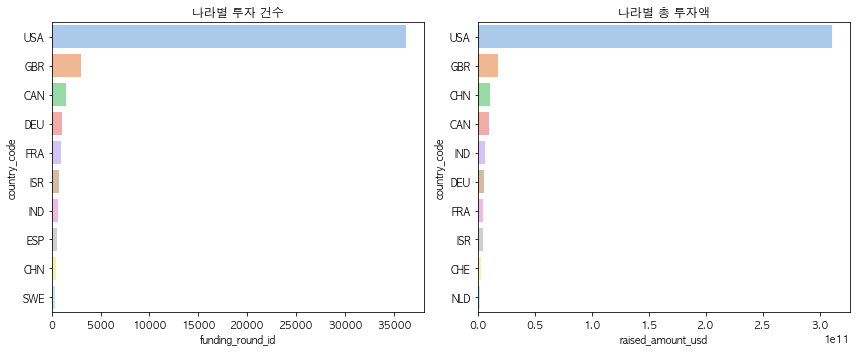

In [15]:
# 나라별 투자 건수 
country_invest_cnt = (startup_system.groupby('country_code')['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False)).head(10)

# 나라별 총 투자액
country_total_amount = (startup_system.groupby('country_code')['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False)).head(10)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 나라별 투자 건수 수평 막대 그래프
sns.barplot(data=country_invest_cnt, x='funding_round_id', y='country_code', palette='pastel', hue='country_code', ax=axes[0])
axes[0].set_title('나라별 투자 건수')

# 나라별 총 투자액 수평 막대 그래프
sns.barplot(data=country_total_amount, x='raised_amount_usd', y='country_code', palette='pastel', hue='country_code', ax=axes[1])
axes[1].set_title('나라별 총 투자액')

plt.tight_layout()
plt.show()

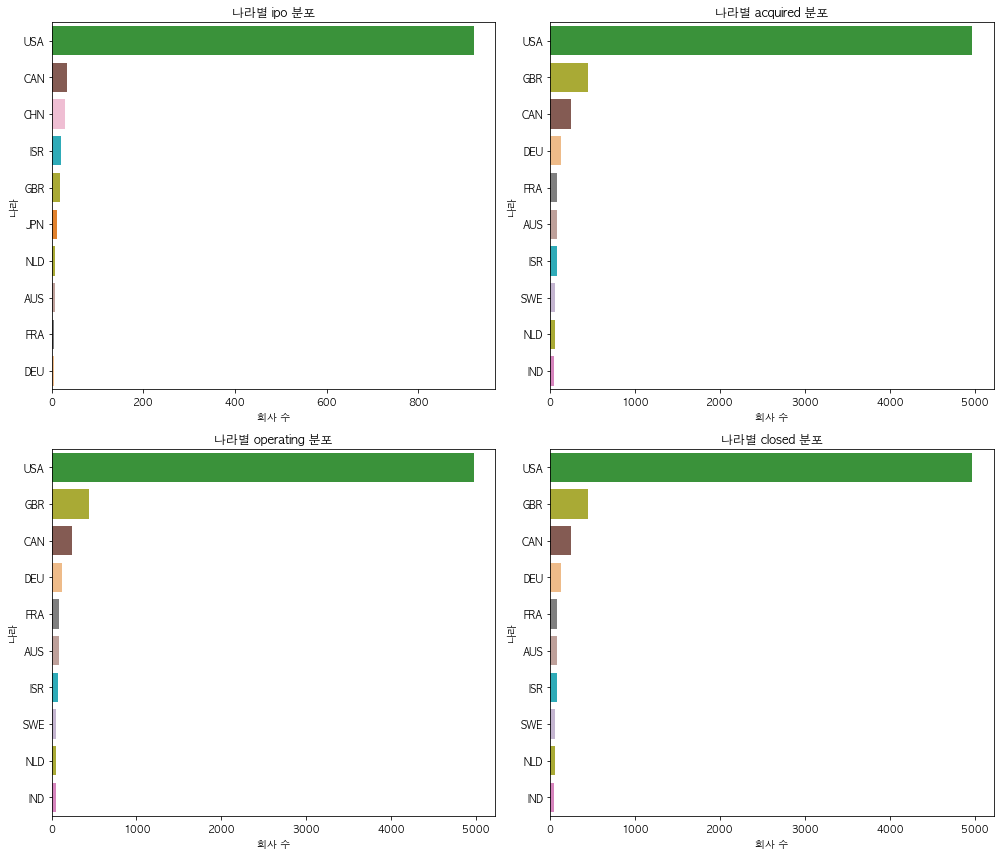

In [16]:
# 나라별 성공(ipo, acqusition) 스타트업 분포
country_success = (company.groupby(['country_code', 'status'])['objects_cfpr_id']
                       .count().reset_index())

# status 차트 모음
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 색 지정
# 1) 전체 나라 리스트
country = country_success['country_code'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(country))

# 3) country_code → color 매핑 딕셔너리
cat_palette = dict(zip(country, base_colors))

# ----------------------------
# 나라별 ipo 분포
# ipo 만 필터
ipo_df = country_success[country_success['status'] == 'ipo'].sort_values('objects_cfpr_id', ascending=False).head(10)

# ipo 수평 바 그래프
sns.barplot(data=ipo_df, x='objects_cfpr_id', y='country_code', palette=cat_palette, hue='country_code', ax=axes[0,0], legend=False)
axes[0,0].set_title('나라별 ipo 분포')
axes[0,0].set_xlabel('회사 수')
axes[0,0].set_ylabel('나라')

# ----------------------------
# 나라별 acquired 분포
# acquired 만 필터
acquired_df = country_success[country_success['status'] == 'acquired'].sort_values('objects_cfpr_id', ascending=False).head(10)

# acquired 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='country_code', palette=cat_palette, hue='country_code', ax=axes[0,1])
axes[0,1].set_title('나라별 acquired 분포')
axes[0,1].set_xlabel('회사 수')
axes[0,1].set_ylabel('나라')

# ----------------------------
# 나라별 operating 분포
# operating 만 필터
operationg_df = country_success[country_success['status'] == 'operating'].sort_values('objects_cfpr_id', ascending=False).head(10)

# operating 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='country_code', palette=cat_palette, hue='country_code', ax=axes[1,0])
axes[1,0].set_title('나라별 operating 분포')
axes[1,0].set_xlabel('회사 수')
axes[1,0].set_ylabel('나라')

# ----------------------------
# 나라별 closed 분포
# closed 만 필터
operationg_df = country_success[country_success['status'] == 'closed'].sort_values('objects_cfpr_id', ascending=False).head(10)

# closed 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='country_code', palette=cat_palette, hue='country_code', ax=axes[1,1])
axes[1,1].set_title('나라별 closed 분포')
axes[1,1].set_xlabel('회사 수')
axes[1,1].set_ylabel('나라')

plt.tight_layout()
plt.show()


In [51]:
# 나라별 대표 산업
country_category = (company
                    .dropna(subset=['country_code', 'obj_category_filled'])
                    .groupby(['country_code', 'obj_category_filled'])['objects_cfpr_id']
                    .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))


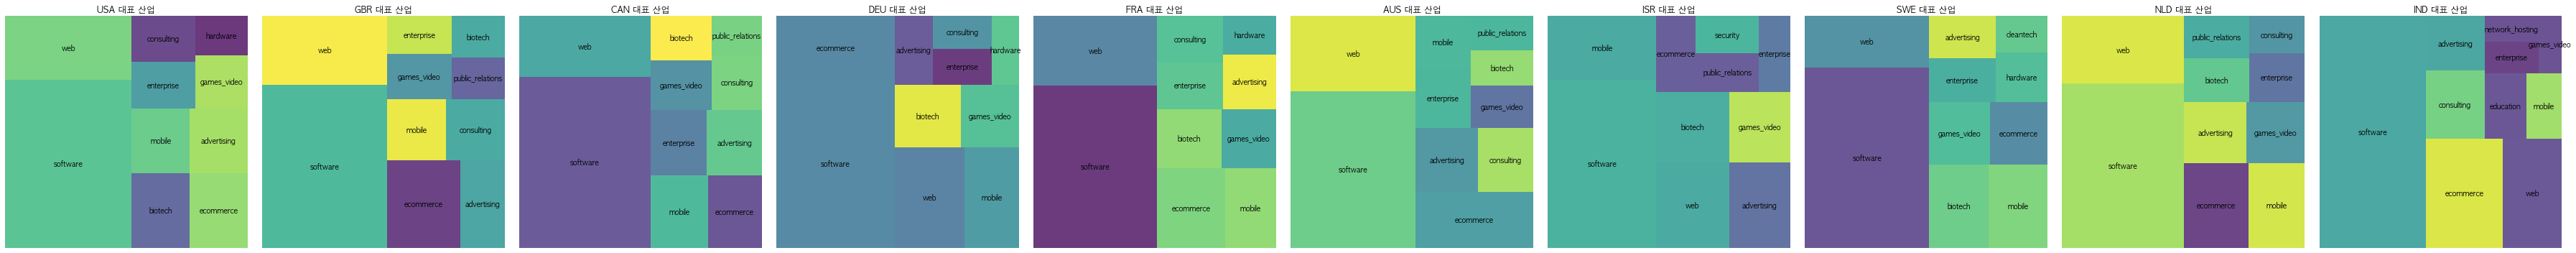

In [52]:
# 트리맵 시각화
import squarify

country = ['USA', 'GBR', 'CAN', 'DEU', 'FRA', 'AUS', 'ISR', 'SWE', 'NLD', 'IND']
fig, axes = plt.subplots(1, len(country), figsize=(50, 5))

for ax, c in zip(axes, country):
    df = country_category[country_category['country_code'] == c].sort_values('objects_cfpr_id', ascending=False).head(10)

    sizes = df['objects_cfpr_id']
    labels = df['obj_category_filled']

    plt.sca(ax)  # 각 subplot을 현재 axis로 설정
    squarify.plot(sizes=sizes, label=labels, alpha=0.8)
    ax.set_title(f'{c} 대표 산업')
    ax.axis('off')

plt.tight_layout()
plt.show()


### 주/도 코드 별

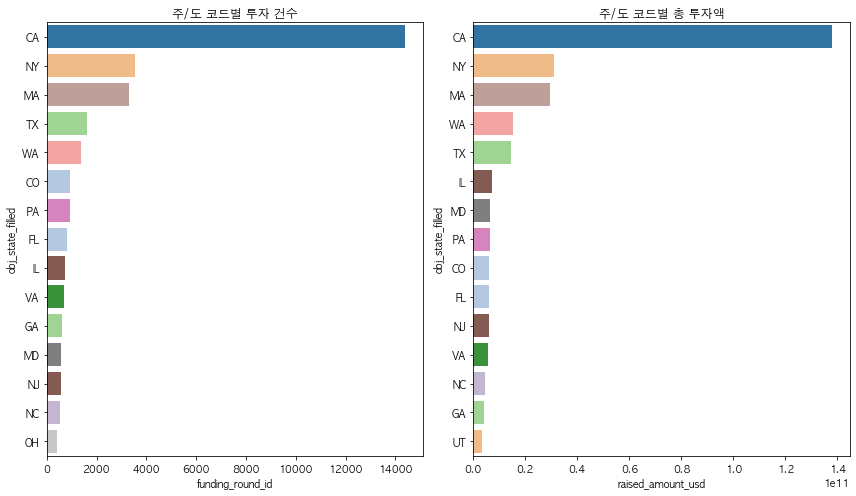

In [19]:
# 주/도 코드별 투자 건수 
state_invest_cnt = (startup_system.groupby('obj_state_filled')['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False)).head(15)

# 주/도 코드별 총 투자액
state_total_amount = (startup_system.groupby('obj_state_filled')['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False)).head(15)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# 색 지정
# 1) 전체 주/도 코드 리스트
state = startup_system['obj_state_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(state))

# 3) obj_state_filled → color 매핑 딕셔너리
cat_palette = dict(zip(state, base_colors))

# 주/도 코드별 투자 건수 수평 막대 그래프
sns.barplot(data=state_invest_cnt, x='funding_round_id', y='obj_state_filled', palette= cat_palette, hue='obj_state_filled', ax=axes[0])
axes[0].set_title('주/도 코드별 투자 건수')

# 주/도 코드별 총 투자액 수평 막대 그래프
sns.barplot(data=state_total_amount, x='raised_amount_usd', y='obj_state_filled', palette= cat_palette, hue='obj_state_filled', ax=axes[1])
axes[1].set_title('주/도 코드별 총 투자액')

plt.tight_layout()
plt.show()

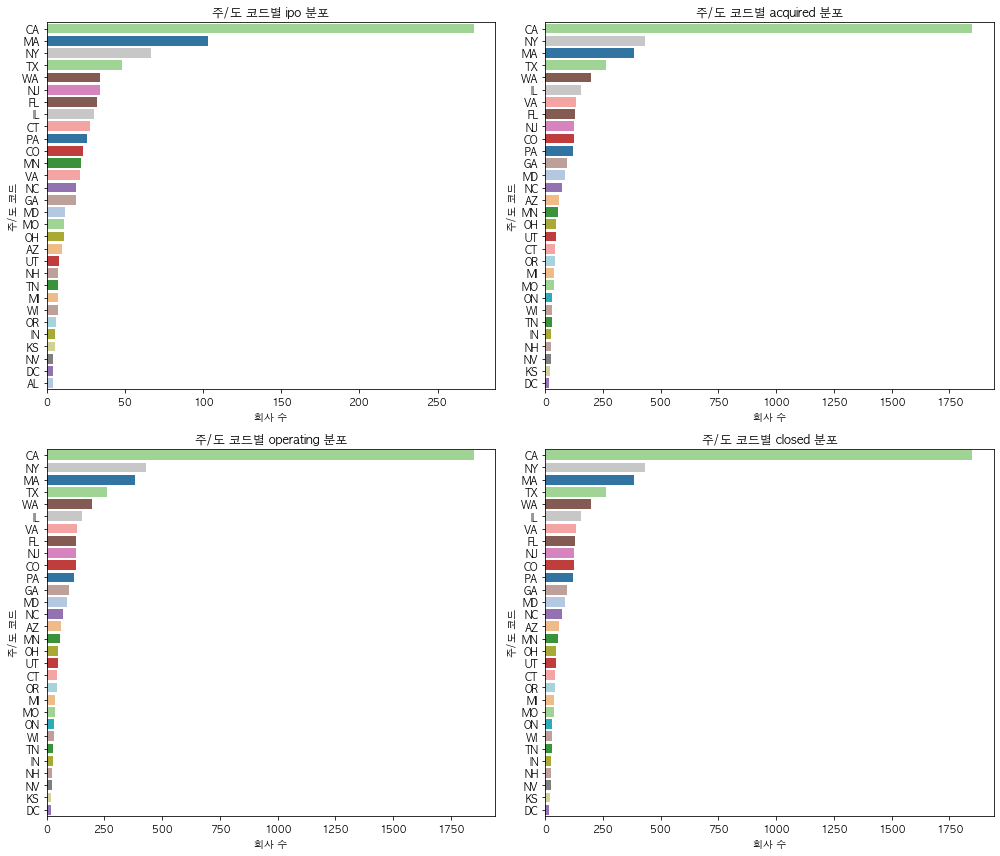

In [20]:
# 주/도 코드별 성공(ipo, acqusition) 스타트업 분포
state_success = (company.groupby(['obj_state_filled', 'status'])['objects_cfpr_id']
                       .count().reset_index())

# status 차트 모음
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 색 지정
# 1) 전체 주/도 코드 리스트
state = state_success['obj_state_filled'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(state))

# 3) obj_state_filled → color 매핑 딕셔너리
cat_palette = dict(zip(state, base_colors))

# ----------------------------
# 주/도 코드별 ipo 분포
# ipo 만 필터
ipo_df = state_success[state_success['status'] == 'ipo'].sort_values('objects_cfpr_id', ascending=False).head(30)

# ipo 수평 바 그래프
sns.barplot(data=ipo_df, x='objects_cfpr_id', y='obj_state_filled', palette=cat_palette, hue='obj_state_filled', ax=axes[0,0], legend=False)
axes[0,0].set_title('주/도 코드별 ipo 분포')
axes[0,0].set_xlabel('회사 수')
axes[0,0].set_ylabel('주/도 코드')

# ----------------------------
# 주/도 코드별 acquired 분포
# acquired 만 필터
acquired_df = state_success[state_success['status'] == 'acquired'].sort_values('objects_cfpr_id', ascending=False).head(30)

# acquired 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_state_filled', palette=cat_palette, hue='obj_state_filled', ax=axes[0,1])
axes[0,1].set_title('주/도 코드별 acquired 분포')
axes[0,1].set_xlabel('회사 수')
axes[0,1].set_ylabel('주/도 코드')

# ----------------------------
# 주/도 코드별 operating 분포
# operating 만 필터
operationg_df = state_success[state_success['status'] == 'operating'].sort_values('objects_cfpr_id', ascending=False).head(30)

# operating 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_state_filled', palette=cat_palette, hue='obj_state_filled', ax=axes[1,0])
axes[1,0].set_title('주/도 코드별 operating 분포')
axes[1,0].set_xlabel('회사 수')
axes[1,0].set_ylabel('주/도 코드')

# ----------------------------
# 주/도 코드별 closed 분포
# closed 만 필터
operationg_df = state_success[state_success['status'] == 'closed'].sort_values('objects_cfpr_id', ascending=False).head(30)

# closed 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_state_filled', palette=cat_palette, hue='obj_state_filled', ax=axes[1,1])
axes[1,1].set_title('주/도 코드별 closed 분포')
axes[1,1].set_xlabel('회사 수')
axes[1,1].set_ylabel('주/도 코드')

plt.tight_layout()
plt.show()


<Figure size 1008x576 with 0 Axes>

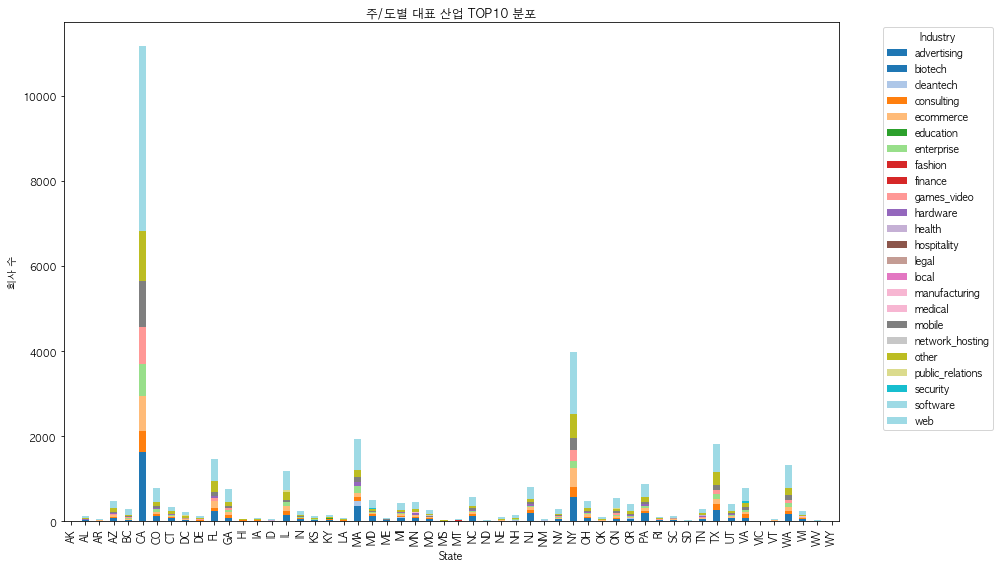

In [21]:
# 1) 주/도별 산업 집계
state_category = (
    company.dropna(subset=['obj_state_filled', 'category_code'])
           .groupby(['obj_state_filled', 'category_code'])['objects_cfpr_id']
           .nunique()
           .reset_index()
)

# 2) 각 주/도별 대표 산업 TOP10만 남기기
state_top10 = (
    state_category
    .sort_values(['obj_state_filled', 'objects_cfpr_id'], ascending=[True, False])
    .groupby('obj_state_filled')
    .head(10)
)

# 3) pivot table 생성
pivot_state_cat = state_top10.pivot(
    index='obj_state_filled',
    columns='category_code',
    values='objects_cfpr_id'
).fillna(0)

# 4) 누적 막대그래프
plt.figure(figsize=(14, 8))
pivot_state_cat.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(14, 8)
)

plt.title('주/도별 대표 산업 TOP10 분포')
plt.xlabel('State')
plt.ylabel('회사 수')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 도시별 

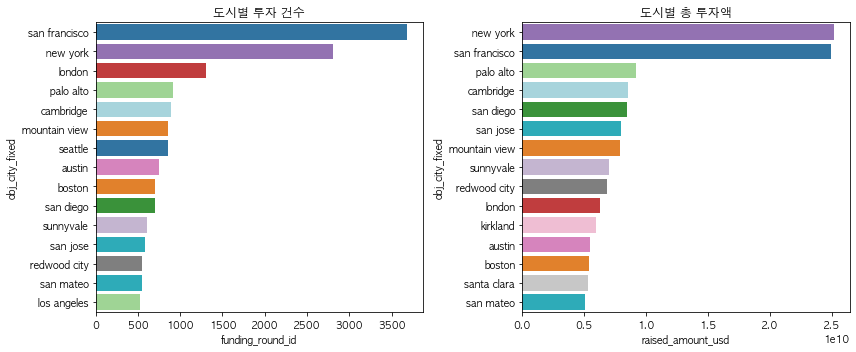

In [22]:
# 도시별 투자 건수 
region_invest_cnt = (startup_system.groupby('obj_city_fixed')['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False)).head(15)

# 도시별 총 투자액
region_total_amount = (startup_system.groupby('obj_city_fixed')['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False)).head(15)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 색 지정
# 1) 전체 지역 리스트
region = startup_system['obj_city_fixed'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(region))

# 3) obj_city_fixed → color 매핑 딕셔너리
cat_palette = dict(zip(region, base_colors))

# 도시별 투자 건수 수평 막대 그래프
sns.barplot(data=region_invest_cnt, x='funding_round_id', y='obj_city_fixed', palette= cat_palette, hue='obj_city_fixed', ax=axes[0])
axes[0].set_title('도시별 투자 건수')

# 도시별 총 투자액 수평 막대 그래프
sns.barplot(data=region_total_amount, x='raised_amount_usd', y='obj_city_fixed', palette= cat_palette, hue='obj_city_fixed', ax=axes[1])
axes[1].set_title('도시별 총 투자액')

plt.tight_layout()
plt.show()

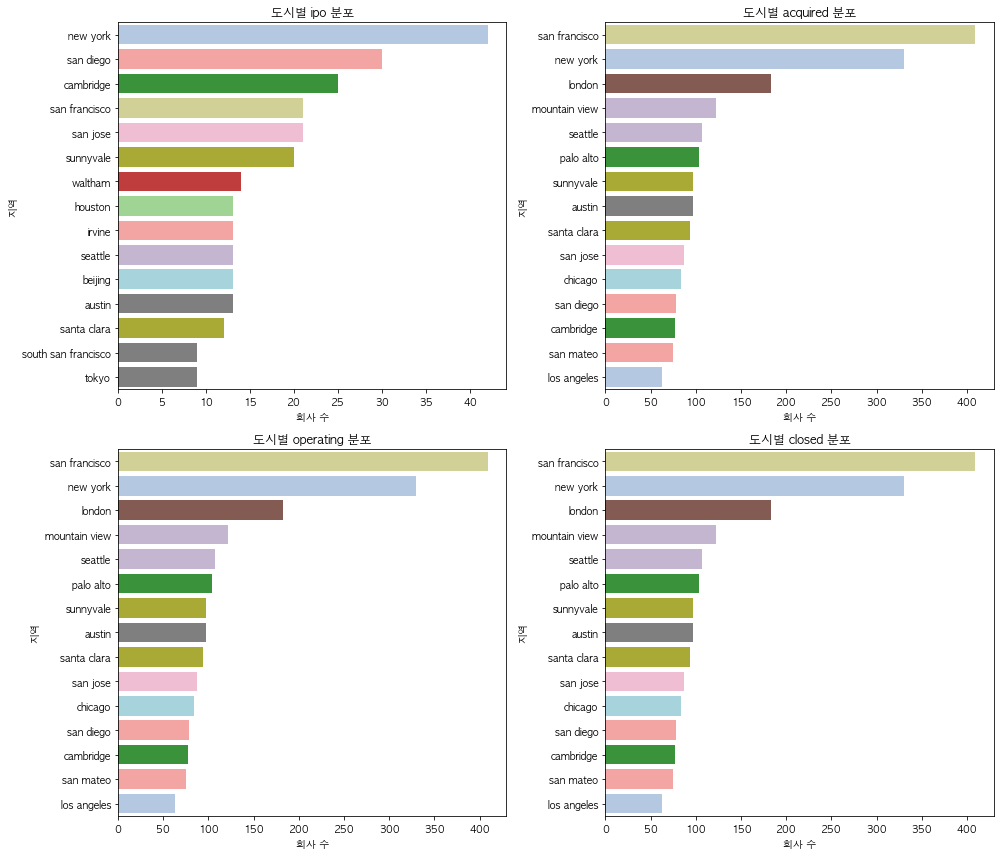

In [23]:
# 도시별 성공(ipo, acqusition) 스타트업 분포
region_success = (company.groupby(['obj_city_fixed', 'status'])['objects_cfpr_id']
                       .count().reset_index())

# status 차트 모음
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 색 지정
# 1) 전체 지역 리스트
region = region_success['obj_city_fixed'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(region))

# 3) obj_city_fixed → color 매핑 딕셔너리
cat_palette = dict(zip(region, base_colors))

# ----------------------------
# 도시별 ipo 분포
# ipo 만 필터
ipo_df = region_success[region_success['status'] == 'ipo'].sort_values('objects_cfpr_id', ascending=False).head(15)

# ipo 수평 바 그래프
sns.barplot(data=ipo_df, x='objects_cfpr_id', y='obj_city_fixed', palette=cat_palette, hue='obj_city_fixed', ax=axes[0,0], legend=False)
axes[0,0].set_title('도시별 ipo 분포')
axes[0,0].set_xlabel('회사 수')
axes[0,0].set_ylabel('지역')

# ----------------------------
# 도시별 acquired 분포
# acquired 만 필터
acquired_df = region_success[region_success['status'] == 'acquired'].sort_values('objects_cfpr_id', ascending=False).head(15)

# acquired 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_city_fixed', palette=cat_palette, hue='obj_city_fixed', ax=axes[0,1])
axes[0,1].set_title('도시별 acquired 분포')
axes[0,1].set_xlabel('회사 수')
axes[0,1].set_ylabel('지역')

# ----------------------------
# 도시별 operating 분포
# operating 만 필터
operationg_df = region_success[region_success['status'] == 'operating'].sort_values('objects_cfpr_id', ascending=False).head(15)

# operating 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_city_fixed', palette=cat_palette, hue='obj_city_fixed', ax=axes[1,0])
axes[1,0].set_title('도시별 operating 분포')
axes[1,0].set_xlabel('회사 수')
axes[1,0].set_ylabel('지역')

# ----------------------------
# 도시별 closed 분포
# closed 만 필터
operationg_df = region_success[region_success['status'] == 'closed'].sort_values('objects_cfpr_id', ascending=False).head(15)

# closed 수평 바 그래프 
sns.barplot(data=acquired_df, x='objects_cfpr_id', y='obj_city_fixed', palette=cat_palette, hue='obj_city_fixed', ax=axes[1,1])
axes[1,1].set_title('도시별 closed 분포')
axes[1,1].set_xlabel('회사 수')
axes[1,1].set_ylabel('지역')

plt.tight_layout()
plt.show()


<Figure size 1008x576 with 0 Axes>

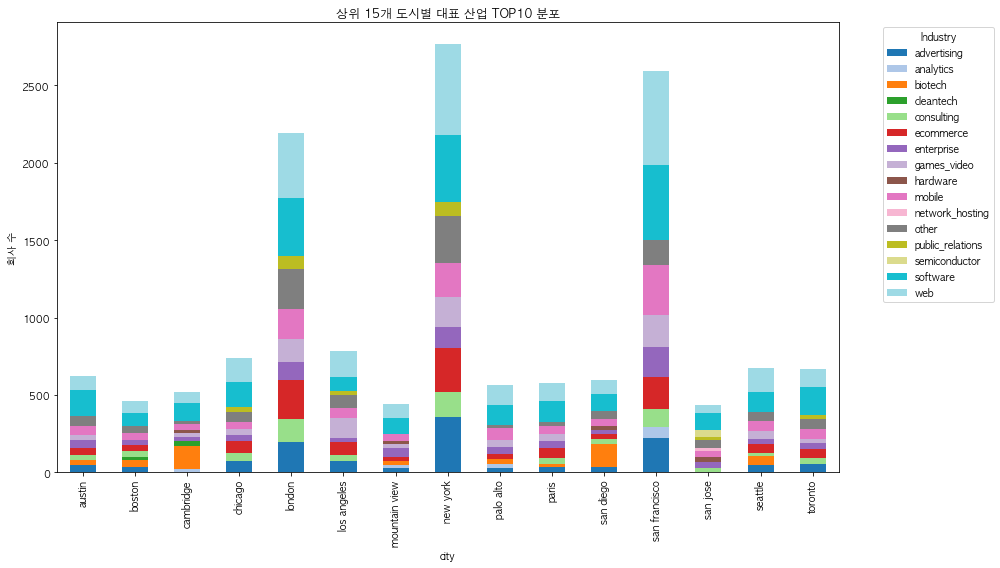

In [24]:
# 1) 도시별 산업 집계 
region_category = (
    company.dropna(subset=['obj_city_fixed', 'category_code'])
           .groupby(['obj_city_fixed', 'category_code'])['objects_cfpr_id']
           .nunique()
           .reset_index()
)

# 2) 전체 산업 기준 상위 15개 도시
top15_cities = (
    region_category.groupby('obj_city_fixed')['objects_cfpr_id']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
region_top_city = region_category[region_category['obj_city_fixed'].isin(top15_cities)]

# 2) 각 도시별 대표 산업 TOP10만 남기기 
region_top10 = (
    region_top_city
    .sort_values(['obj_city_fixed', 'objects_cfpr_id'], ascending=[True, False])
    .groupby('obj_city_fixed')
    .head(10)
)

# 3) pivot table 생성
pivot_city_cat = region_top10.pivot(
    index='obj_city_fixed',
    columns='category_code',
    values='objects_cfpr_id'
).fillna(0)

# 4) 누적 막대그래프
plt.figure(figsize=(14, 8))
pivot_city_cat.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(14, 8)
)

plt.title('상위 15개 도시별 대표 산업 TOP10 분포')
plt.xlabel('city')
plt.ylabel('회사 수')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 투자 단계별 동향 분석
- 단계별 투자 
- 단계별 exit
- 라운드 템포 

### 단계별 투자 건수, 회사 수, 금액

In [25]:
FundingRounds

,funding_round_id,fr_c_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round,funded_year,funded_quarter,cat_fr_type,num_fr_type,log_participants,is_fr_raised_private
0,1,c:4,2006-12-01,series-b,b,8500000.0,NaN,NaN,2,0,0,2006.0,2006Q4,series-b,2,1.098612,0
1,2,c:5,2004-09-01,angel,angel,500000.0,NaN,NaN,2,0,1,2004.0,2004Q3,seed,0,1.098612,0
2,3,c:5,2005-05-01,series-a,a,12700000.0,115000000.0,NaN,3,0,0,2005.0,2005Q2,series-a,1,1.386294,0
3,4,c:5,2006-04-01,series-b,b,27500000.0,525000000.0,NaN,4,0,0,2006.0,2006Q2,series-b,2,1.609438,0
4,5,c:7299,2006-05-01,series-b,b,10500000.0,NaN,NaN,2,0,0,2006.0,2006Q2,series-b,2,1.098612,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,c:211890,2013-12-12,series-a,a,3000000.0,NaN,NaN,1,1,1,2013.0,2013Q4,series-a,1,0.693147,0
52924,57949,c:267427,2010-02-06,venture,partial,570000.0,NaN,NaN,0,0,1,2010.0,2010Q1,venture,99,0.000000,0
52925,57950,c:261728,2010-02-06,venture,unattributed,2184100.0,NaN,NaN,0,0,1,2010.0,2010Q1,venture,99,0.000000,0
52926,57951,c:285864,2013-12-12,series-a,a,790783.0,NaN,NaN,0,1,1,2013.0,2013Q4,series-a,1,0.000000,0


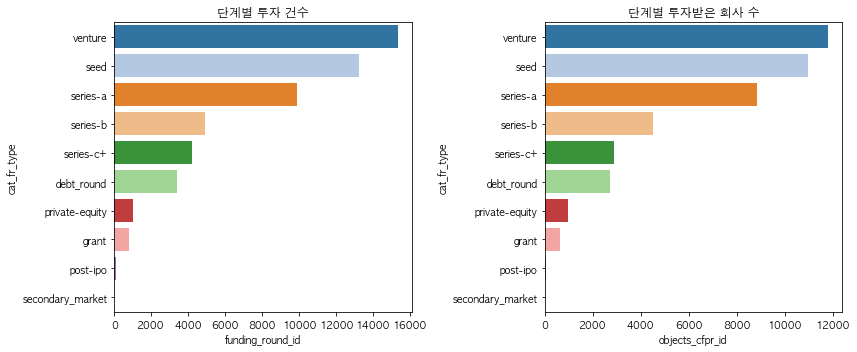

In [26]:
# 단계별 총 투자 건수
round_invest_cnt = (startup_system.groupby('cat_fr_type')['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False))

# 단계별 투자받은 회사 수
round_company_cnt = (startup_system.groupby('cat_fr_type')['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 색 지정
# 1) 전체 단계 리스트
rounds = round_invest_cnt['cat_fr_type'].unique()

# 2) 카테고리 개수만큼 색 뽑기 
base_colors = sns.color_palette('tab20', n_colors=len(rounds))

# 3) cat_obj_region → color 매핑 딕셔너리
cat_palette = dict(zip(rounds, base_colors))

# 단계별 투자 건수 수평 막대 그래프
sns.barplot(data=round_invest_cnt, x='funding_round_id', y='cat_fr_type', palette= cat_palette, hue='cat_fr_type', ax=axes[0])
axes[0].set_title('단계별 투자 건수')

# 단계별 투자받은 회사 수 수평 막대 그래프
sns.barplot(data=round_company_cnt, x='objects_cfpr_id', y='cat_fr_type', palette= cat_palette, hue='cat_fr_type', ax=axes[1])
axes[1].set_title('단계별 투자받은 회사 수')

plt.tight_layout()
plt.show()

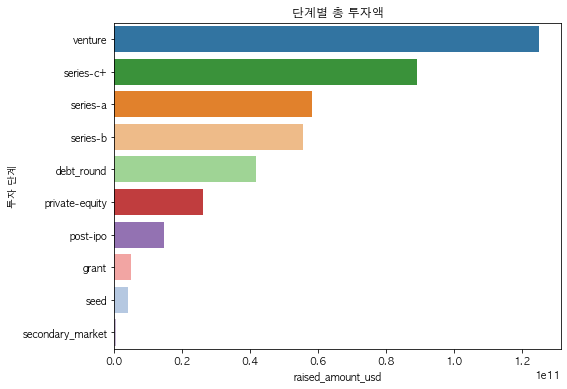

In [27]:
# 단계별 총 투자액
round_invest_amount = (startup_system.groupby('cat_fr_type')['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False))

# 시각화
plt.figure(figsize=(8, 6))

# 단계별 투자 건수 수평 막대 그래프
sns.barplot(data=round_invest_amount, x='raised_amount_usd', y='cat_fr_type', palette= cat_palette, hue='cat_fr_type')
plt.title('단계별 총 투자액')
plt.ylabel('투자 단계')
plt.show()


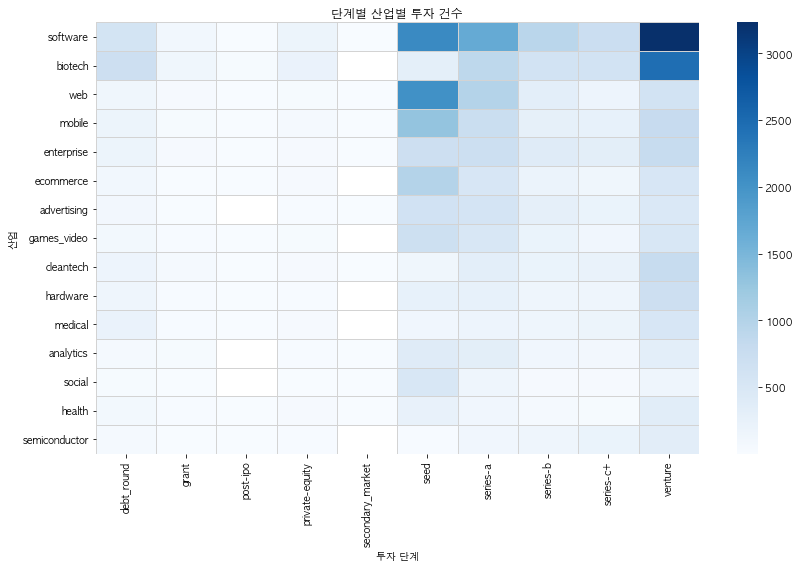

In [53]:
# 단계별 산업별 투자 건수 
round_industry_amount = (startup_system
                         .dropna(subset=['cat_fr_type', 'obj_category_filled', 'funding_round_id'])
                         .groupby(['cat_fr_type', 'obj_category_filled'])['funding_round_id']
                       .count().reset_index().sort_values('funding_round_id', ascending=False))

# 히트맵 용 피벗 테이블 
pivot_stage_industry = round_industry_amount.pivot(
    index='obj_category_filled',   
    columns='cat_fr_type',   
    values='funding_round_id'  
)

# top 15 산업
top_industries = (
    round_industry_amount.groupby('obj_category_filled')['funding_round_id']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
pivot_stage_industry = pivot_stage_industry.loc[top_industries]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_stage_industry,
    cmap='Blues',
    linewidths=0.5,
    linecolor='lightgrey'
)

plt.title('단계별 산업별 투자 건수')
plt.xlabel('투자 단계')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

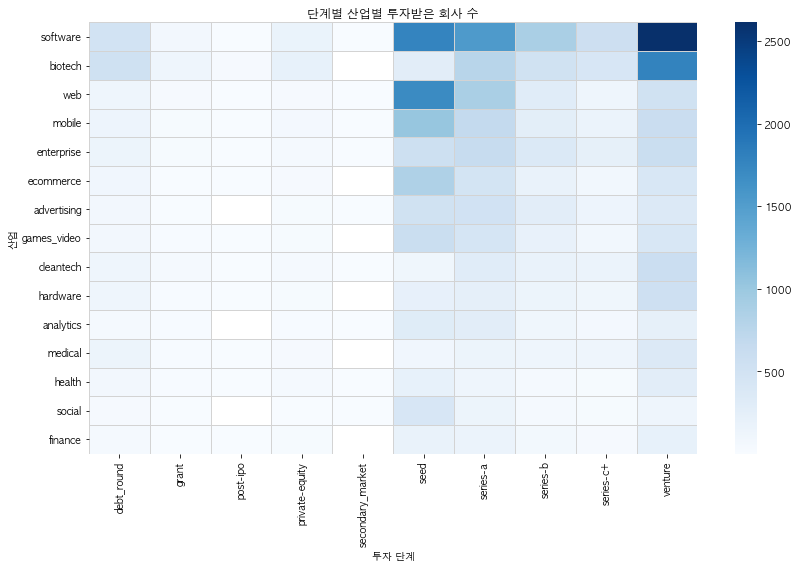

In [54]:
# 단계별 산업별 투자받은 회사 수 
round_industry_amount = (startup_system
                         .dropna(subset=['cat_fr_type', 'obj_category_filled', 'objects_cfpr_id'])
                         .groupby(['cat_fr_type', 'obj_category_filled'])['objects_cfpr_id']
                       .nunique().reset_index().sort_values('objects_cfpr_id', ascending=False))

# 히트맵 용 피벗 테이블 
pivot_stage_industry = round_industry_amount.pivot(
    index='obj_category_filled',   
    columns='cat_fr_type',   
    values='objects_cfpr_id'  
)

# top 15 산업
top_industries = (
    round_industry_amount.groupby('obj_category_filled')['objects_cfpr_id']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
pivot_stage_industry = pivot_stage_industry.loc[top_industries]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_stage_industry,
    cmap='Blues',
    linewidths=0.5,
    linecolor='lightgrey'
)

plt.title('단계별 산업별 투자받은 회사 수')
plt.xlabel('투자 단계')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

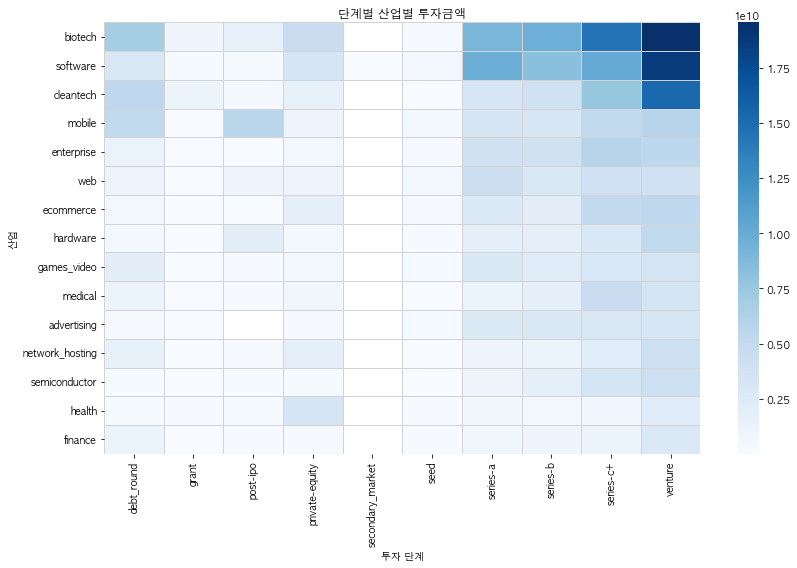

In [55]:
# 단계별 산업별 투자 금액 
round_industry_amount = (startup_system
                         .dropna(subset=['cat_fr_type', 'obj_category_filled', 'raised_amount_usd'])
                         .groupby(['cat_fr_type', 'obj_category_filled'])['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False))

# 히트맵 용 피벗 테이블 
pivot_stage_industry = round_industry_amount.pivot(
    index='obj_category_filled',   
    columns='cat_fr_type',   
    values='raised_amount_usd'  
)

# top 15 산업
top_industries = (
    round_industry_amount.groupby('obj_category_filled')['raised_amount_usd']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
pivot_stage_industry = pivot_stage_industry.loc[top_industries]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_stage_industry,
    cmap='Blues',
    linewidths=0.5,
    linecolor='lightgrey'
)

plt.title('단계별 산업별 투자금액')
plt.xlabel('투자 단계')
plt.ylabel('산업')
plt.tight_layout()
plt.show()

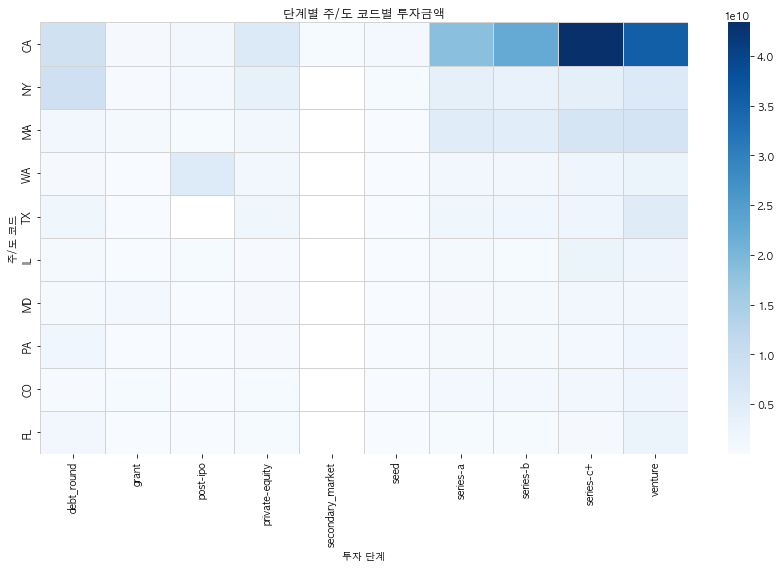

In [31]:
# 단계별 주/도 코드 투자 금액
round_industry_amount = (startup_system
                         .dropna(subset=['cat_fr_type', 'obj_state_filled', 'raised_amount_usd'])
                         .groupby(['cat_fr_type', 'obj_state_filled'])['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False))

# 히트맵 용 피벗 테이블 
pivot_stage_industry = round_industry_amount.pivot(
    index='obj_state_filled',   
    columns='cat_fr_type',   
    values='raised_amount_usd'  
)

# top 10 주/도 코드
top_states = (
    round_industry_amount.groupby('obj_state_filled')['raised_amount_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
pivot_stage_industry = pivot_stage_industry.loc[top_states]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_stage_industry,
    cmap='Blues',
    linewidths=0.5,
    linecolor='lightgrey'
)

plt.title('단계별 주/도 코드별 투자금액')
plt.xlabel('투자 단계')
plt.ylabel('주/도 코드')
plt.tight_layout()
plt.show()

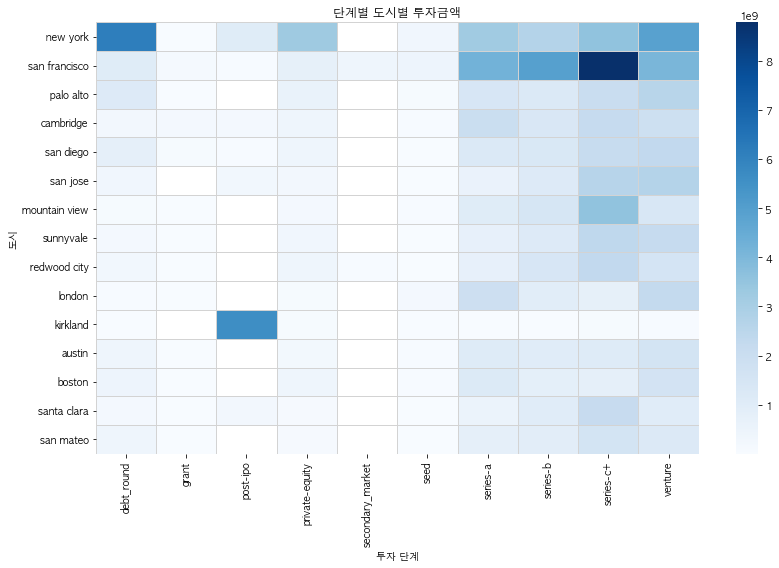

In [32]:
# 단계별 도시 투자 금액 
round_region_amount = (startup_system
                         .dropna(subset=['cat_fr_type', 'obj_city_fixed', 'raised_amount_usd'])
                         .groupby(['cat_fr_type', 'obj_city_fixed'])['raised_amount_usd']
                       .sum().reset_index().sort_values('raised_amount_usd', ascending=False))

# 히트맵 용 피벗 테이블 
pivot_stage_region = round_region_amount.pivot(
    index='obj_city_fixed',   
    columns='cat_fr_type',   
    values='raised_amount_usd'  
)

# top 15 도시 
top_region = (
    round_region_amount.groupby('obj_city_fixed')['raised_amount_usd']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .index
)
pivot_stage_region = pivot_stage_region.loc[top_region]

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_stage_region,
    cmap='Blues',
    linewidths=0.5,
    linecolor='lightgrey'
)

plt.title('단계별 도시별 투자금액')
plt.xlabel('투자 단계')
plt.ylabel('도시')
plt.tight_layout()
plt.show()

### 단계별 투자자 수

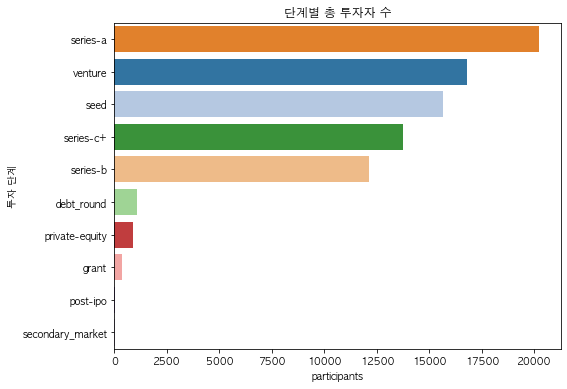

In [33]:
# 단계별 투자자 수 
round_invest_amount = (startup_system.groupby('cat_fr_type')['participants']
                       .sum().reset_index().sort_values('participants', ascending=False))

# 시각화
plt.figure(figsize=(8, 6))

# 단계별 투자자 수 수평 막대 그래프
sns.barplot(data=round_invest_amount, x='participants', y='cat_fr_type', palette= cat_palette, hue='cat_fr_type')
plt.title('단계별 총 투자자 수')
plt.ylabel('투자 단계')
plt.show()


### 단계별 exit 

In [34]:
# 투자 단계별 최종 상태 exit .. ?

# 각 회사의 최신 투자 라운드
last_round = (startup_system
                     .sort_values(['fr_c_id','funded_at'], ascending=[True, False])
                     .groupby('fr_c_id')
                     .head(1))

# 투자 라운드, 상태 조합
grouped_data = last_round.groupby(['cat_fr_type', 'status'])

stage_status = (
    last_round
    .groupby(['cat_fr_type', 'status'])['fr_c_id']   # 회사 ID 기준
    .nunique()                                      # 중복 제거된 회사 수
    .reset_index(name='companies')             
    .sort_values(['cat_fr_type', 'companies'], ascending=[True, False])
)
stage_status

,cat_fr_type,status,companies
3,debt_round,operating,1555
0,debt_round,acquired,137
1,debt_round,closed,78
2,debt_round,ipo,54
7,grant,operating,411
6,grant,ipo,19
5,grant,closed,17
4,grant,acquired,14
8,post-ipo,ipo,54
9,post-ipo,operating,6


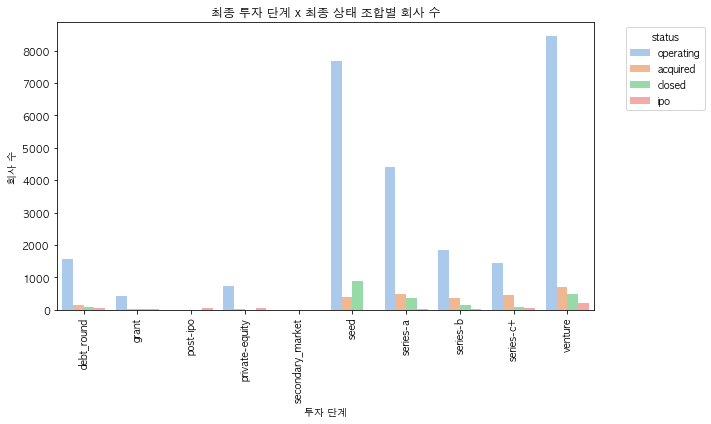

In [35]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=stage_status,
    x='cat_fr_type',
    y='companies',
    hue='status',
    palette='pastel'
)
plt.title('최종 투자 단계 x 최종 상태 조합별 회사 수')
plt.xlabel('투자 단계')
plt.xticks(rotation = 90)
plt.ylabel('회사 수')
plt.legend(title='status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 라운드 템포 분석

- 단계별
- 산업별
- 도시별

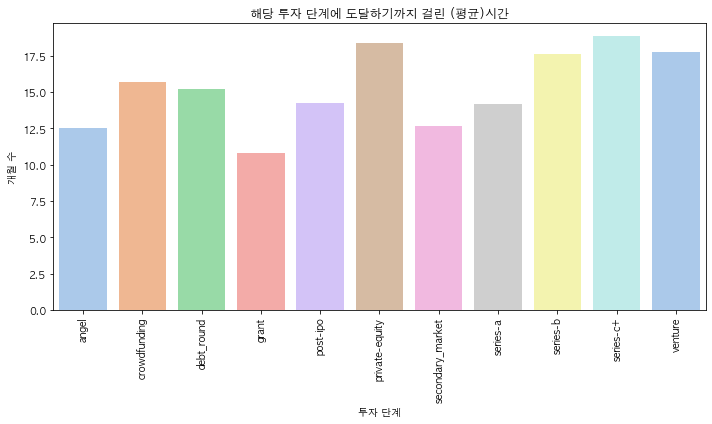

In [36]:
# round tempo 분석 

# 날짜 기준으로 정렬
round_tempo = (startup_system.sort_values(['fr_c_id','funded_at']))

# 회사별 이전 라운드 날짜 가져오기
round_tempo['prev_round_date'] = round_tempo.groupby('fr_c_id')['funded_at'].shift(1)

# 날짜 차이 계산
round_tempo['round_tempo_days'] = (round_tempo['funded_at'] - round_tempo['prev_round_date']).dt.days
round_tempo['round_tempo_months'] = round_tempo['round_tempo_days'] / 30

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = round_tempo[
    round_tempo['cat_fr_type'] != round_tempo['cat_fr_type'].shift(1)
]

# 라운드 별 평균 템포 계산
stage_tempo = (fr_company_valid.groupby('funding_round_type')['round_tempo_months']
               .mean()
               .reset_index()
               )

# round_tempo 시각화 

plt.figure(figsize=(10, 6))
sns.barplot(
    data=stage_tempo,
    x='funding_round_type',
    y='round_tempo_months',
    hue='funding_round_type',
    palette='pastel',
    errorbar= None
)
plt.title('해당 투자 단계에 도달하기까지 걸린 (평균)시간')
plt.xlabel('투자 단계')
plt.xticks(rotation = 90)
plt.ylabel('개월 수')
plt.tight_layout()
plt.show()


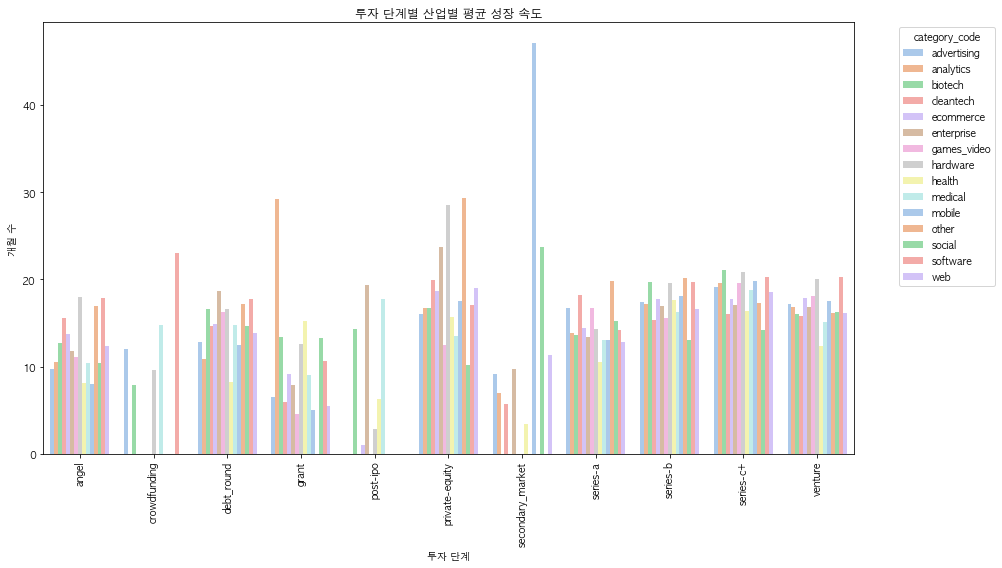

In [37]:
# 산업별 라운드 성장 속도 

# 2) 각 라운드별 대표 산업 TOP15만 남기기 
category_top15 = (
    round_tempo
    .groupby('category_code')['objects_cfpr_id']
    .nunique()
    .sort_values(ascending= False)
    .head(15)
    .index
)

filtered = round_tempo[round_tempo['category_code'].isin(category_top15)]

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = filtered[
    filtered['cat_fr_type'] != filtered['cat_fr_type'].shift(1)
]

# 산업별 라운드 별 평균 템포 계산
stage_tempo = (fr_company_valid.groupby(['funding_round_type', 'category_code'])['round_tempo_months']
               .mean()
               .reset_index()
               )

# round_tempo 시각화 

plt.figure(figsize=(14, 8))
sns.barplot(
    data=stage_tempo,
    x='funding_round_type',
    y='round_tempo_months',
    hue='category_code',
    palette='pastel'
)
plt.title('투자 단계별 산업별 평균 성장 속도')
plt.xlabel('투자 단계')
plt.xticks(rotation = 90)
plt.ylabel('개월 수')
plt.legend(title='category_code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


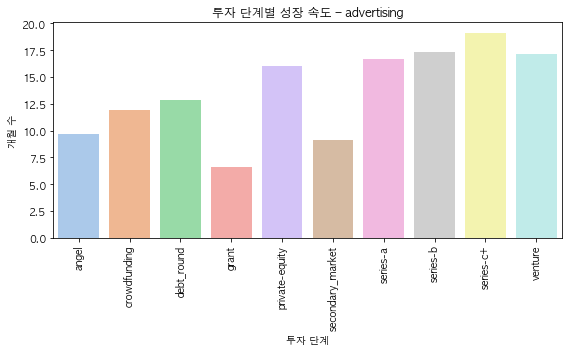

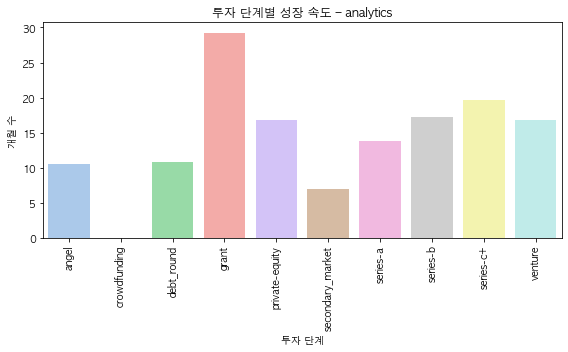

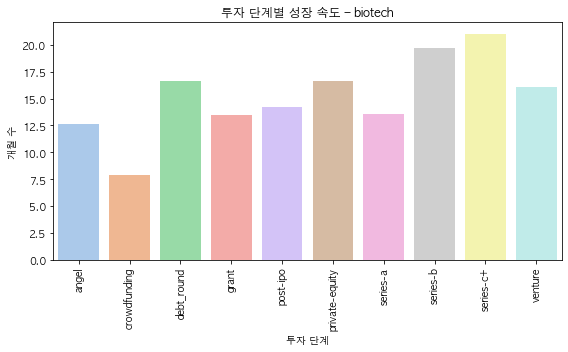

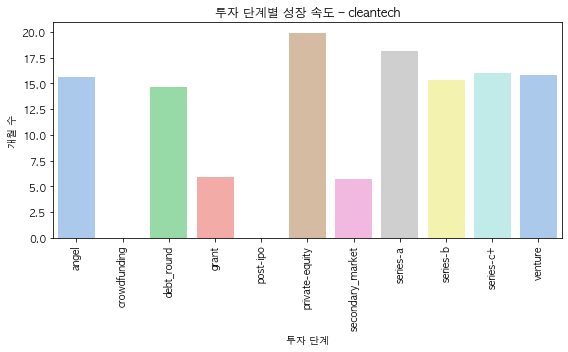

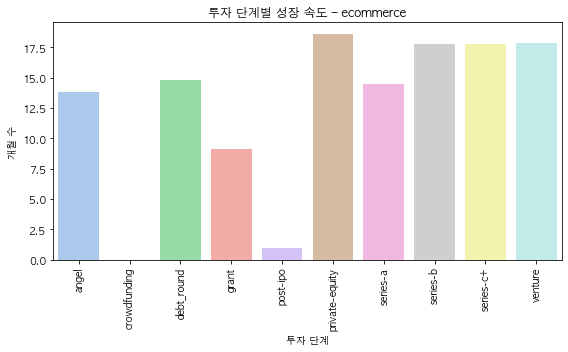

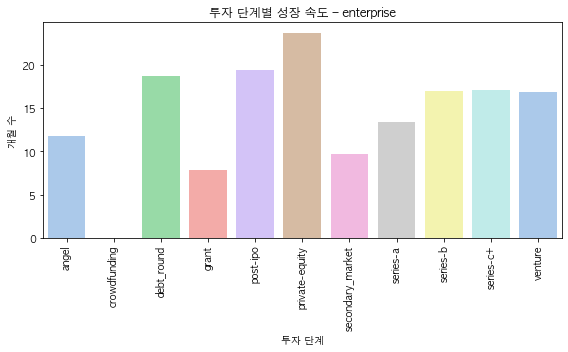

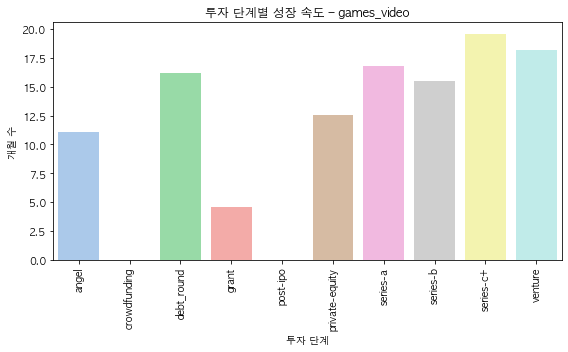

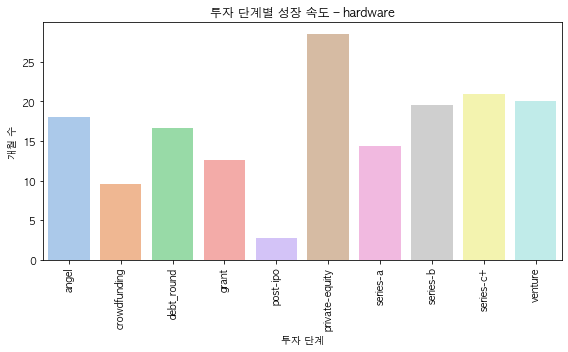

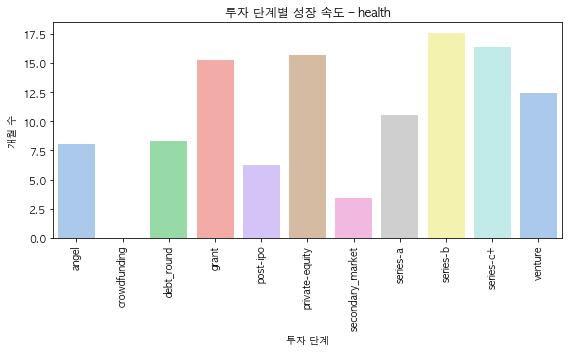

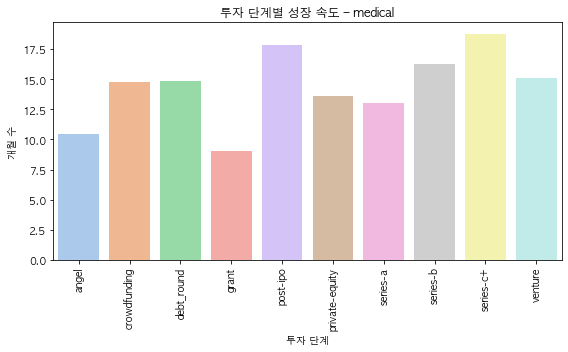

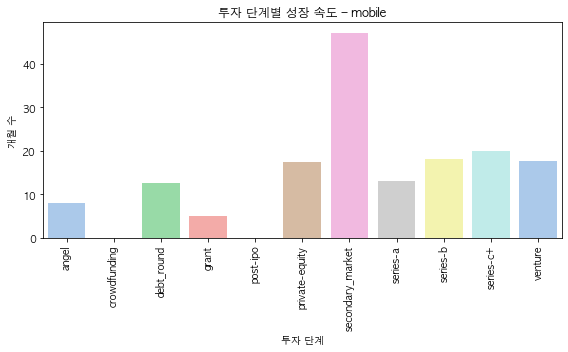

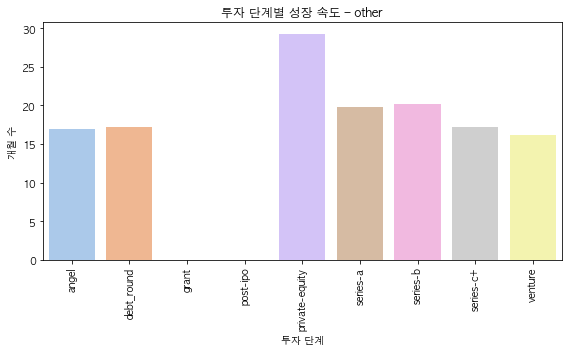

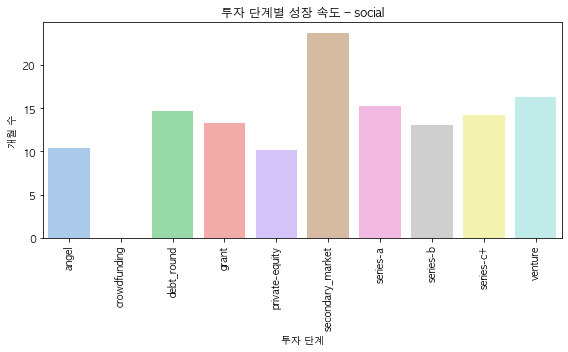

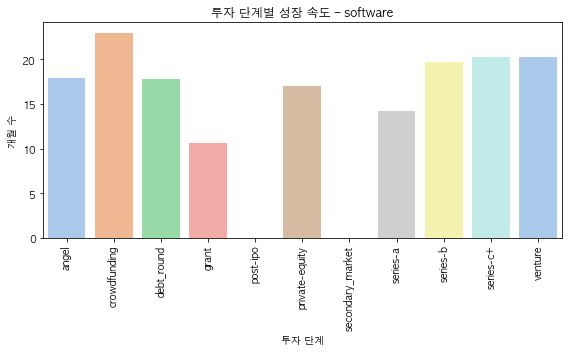

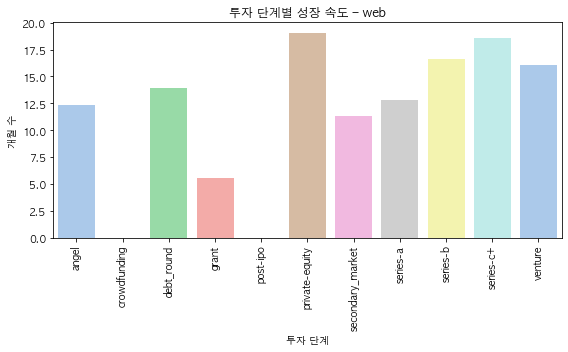

In [38]:
# 각 산업별 투자단계별 성장 속도 
for ind in stage_tempo['category_code'].unique():
    temp = stage_tempo[stage_tempo['category_code'] == ind]

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=temp,
        x='funding_round_type',
        y='round_tempo_months',
        hue= 'funding_round_type',
        palette='pastel'
    )
    plt.title(f'투자 단계별 성장 속도 – {ind}')
    plt.xlabel('투자 단계')
    plt.xticks(rotation = 90)
    plt.ylabel('개월 수')
    plt.tight_layout()
    plt.show()

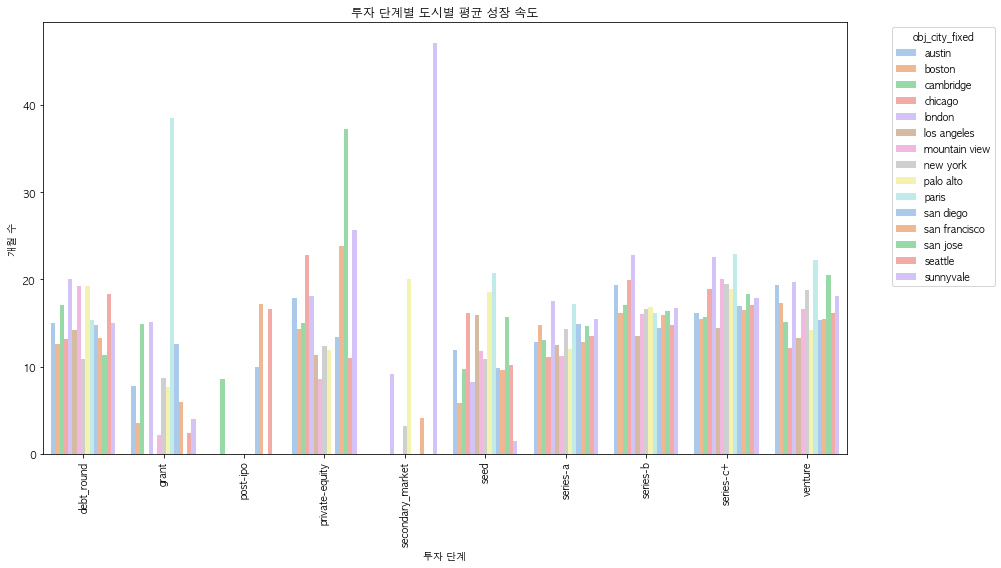

In [39]:
# 도시별 라운드 성장 속도

# 2) 각 라운드별 대표 산업 TOP15만 남기기 
category_top15 = (
    round_tempo
    .groupby('obj_city_fixed')['objects_cfpr_id']
    .nunique()
    .sort_values(ascending= False)
    .head(15)
    .index
)

filtered = round_tempo[round_tempo['obj_city_fixed'].isin(category_top15)]

# 같은 라운드 단계(Same Stage) 제거
fr_company_valid = filtered[
    filtered['cat_fr_type'] != filtered['cat_fr_type'].shift(1)
]

# 도시별 라운드 별 평균 템포 계산
stage_tempo = (fr_company_valid.groupby(['cat_fr_type', 'obj_city_fixed'])['round_tempo_months']
               .mean()
               .reset_index()
               )

# round_tempo 시각화 

plt.figure(figsize=(14, 8))
sns.barplot(
    data=stage_tempo,
    x='cat_fr_type',
    y='round_tempo_months',
    hue='obj_city_fixed',
    palette='pastel'
)
plt.title('투자 단계별 도시별 평균 성장 속도')
plt.xlabel('투자 단계')
plt.xticks(rotation = 90)
plt.ylabel('개월 수')
plt.legend(title='obj_city_fixed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


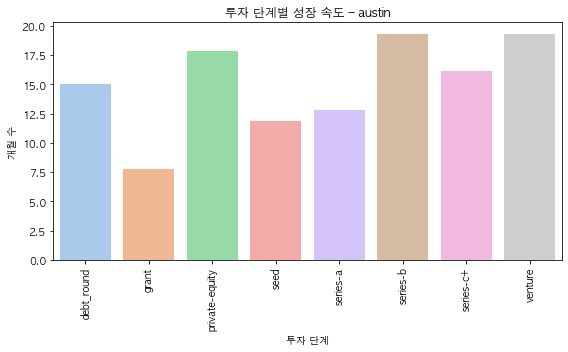

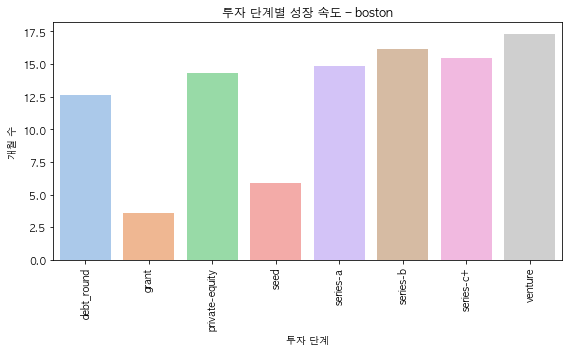

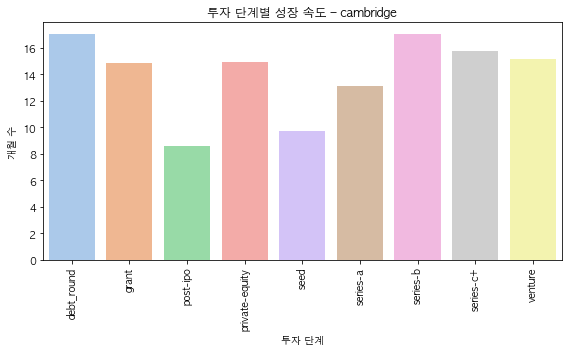

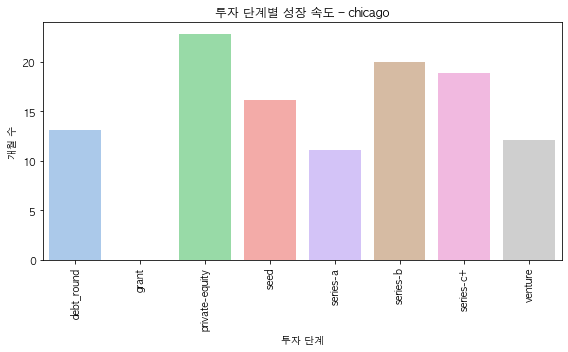

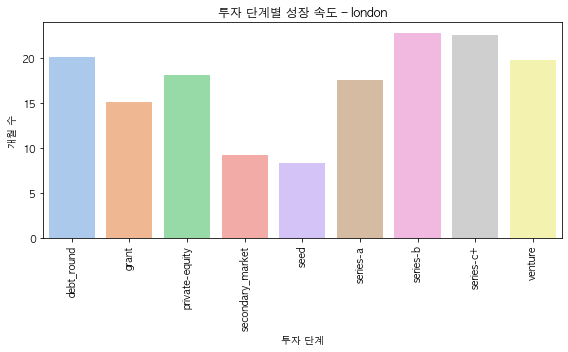

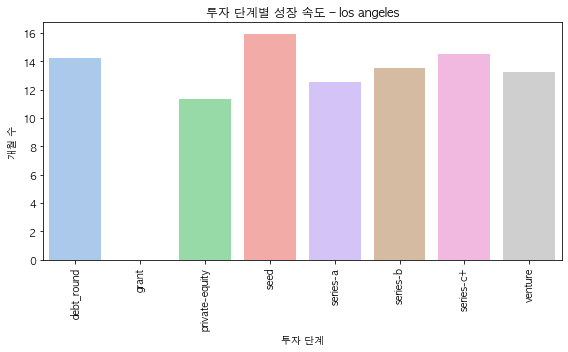

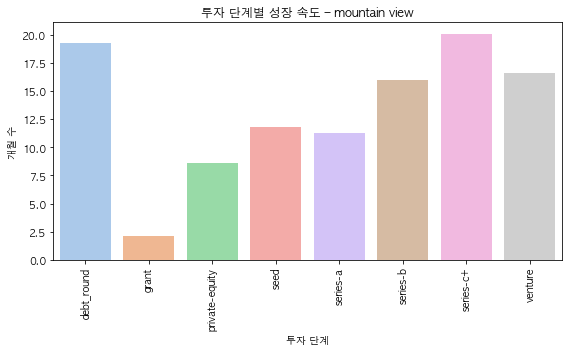

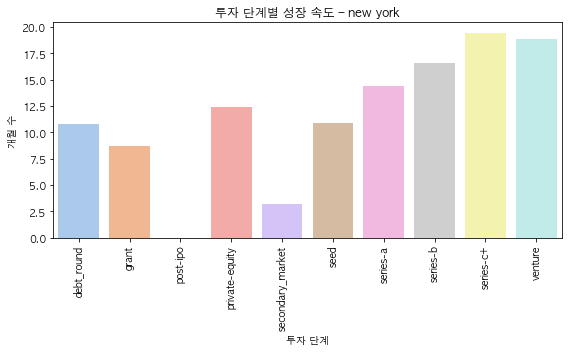

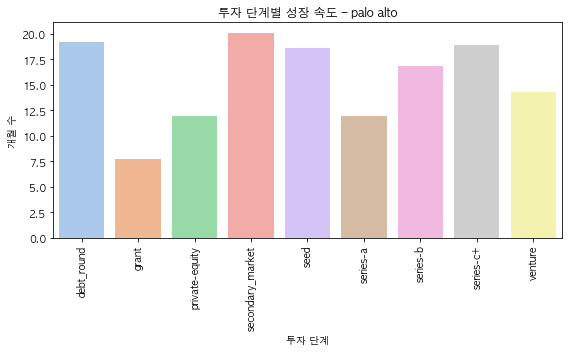

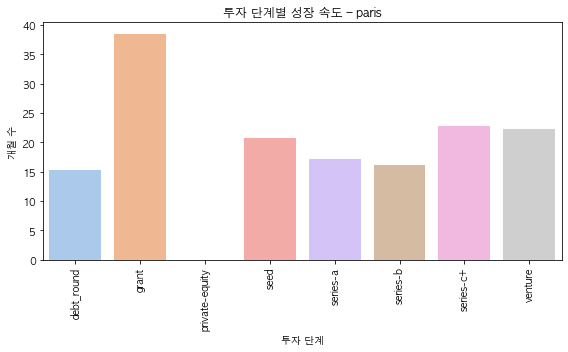

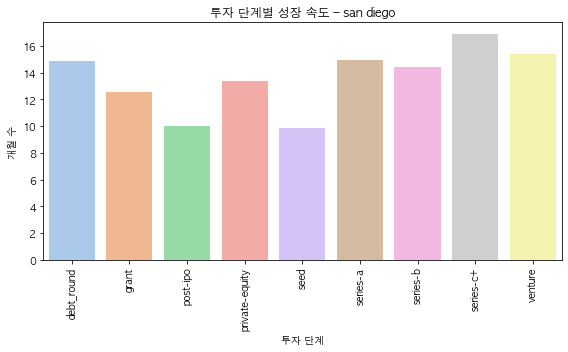

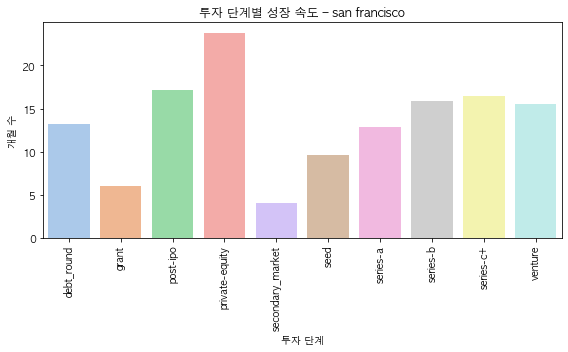

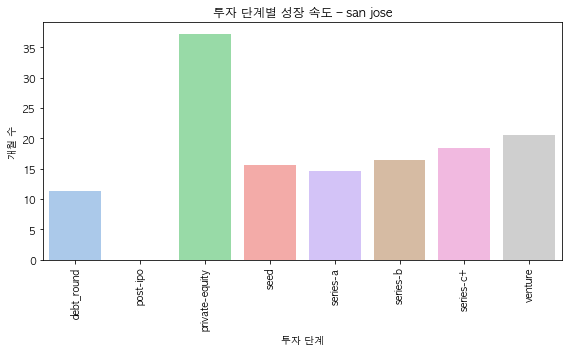

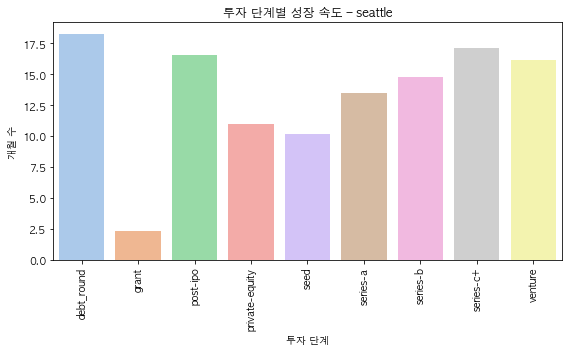

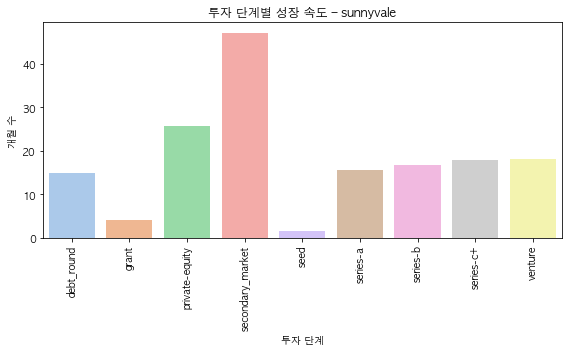

In [40]:
# 각 도시별 라운드별 템포 
for ind in stage_tempo['obj_city_fixed'].unique():
    temp = stage_tempo[stage_tempo['obj_city_fixed'] == ind]

    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=temp,
        x='cat_fr_type',
        y='round_tempo_months',
        hue= 'cat_fr_type',
        palette='pastel'
    )
    plt.title(f'투자 단계별 성장 속도 – {ind}')
    plt.xlabel('투자 단계')
    plt.xticks(rotation = 90)
    plt.ylabel('개월 수')
    plt.tight_layout()
    plt.show()

In [41]:
# product ←> funding_rounds merge
company_product = (
    product
    .merge(FundingRounds, how='left', left_on='parent_c_id', right_on='fr_c_id')
)

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13298/842664341.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_invest_cnt, x='n_products', y='n_rounds', palette='pastel')


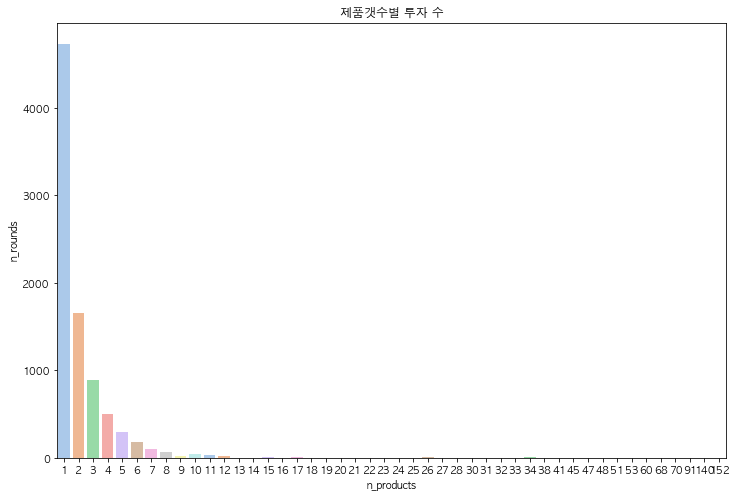

/var/folders/59/zj68531j46j58_ylcbpsyxl80000gn/T/ipykernel_13298/842664341.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_invest_sum, x='n_products', y='sum_amount', palette='pastel')


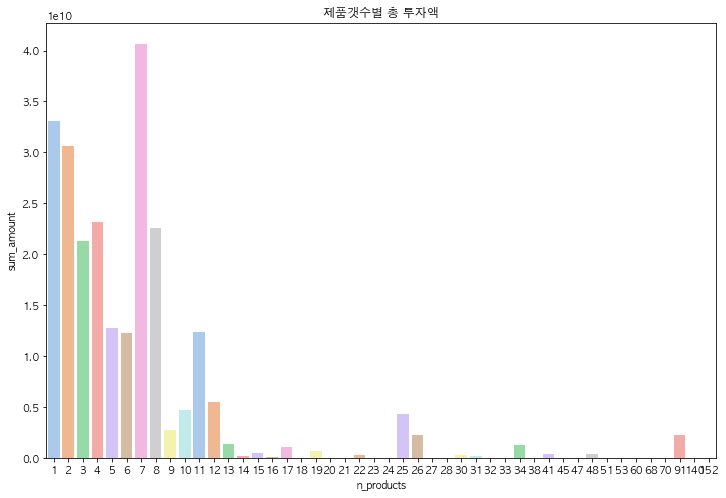

In [42]:
# 제품 갯수별로 투자자 수 비교
company_level = (
    company_product
    .groupby('parent_c_id')
    .agg(
        n_products = ('objects_cfpr_id', 'nunique'),     # 회사가 가진 제품 개수
        n_rounds   = ('funding_round_id', 'nunique')       # 그 회사의 투자 라운드 개수
    )
    .reset_index()
)

# 제품 개수별 총 투자 라운드 수
product_invest_cnt = (
    company_level
    .groupby('n_products')['n_rounds']
    .sum()
    .reset_index()
    .sort_values('n_rounds', ascending=False)
)

# 제품갯수별 투자 건수 수평 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(data=product_invest_cnt, x='n_products', y='n_rounds', palette='pastel')
plt.title('제품갯수별 투자 수')
plt.show()

####################################
# 제품 갯수별로 투자액 비교 
company_amount = (
    company_product
    .groupby('parent_c_id')
    .agg(
        n_products = ('objects_cfpr_id', 'nunique'),     # 회사가 가진 제품 개수
        sum_amount   = ('raised_amount_usd', 'sum')       # 그 회사의 투자 라운드 개수
    )
    .reset_index()
)

# 제품갯수별 총 투자액
product_invest_sum = (
    company_amount
    .groupby('n_products')['sum_amount']
    .sum()
    .reset_index()
    .sort_values('sum_amount', ascending=False)
)

# 제품갯수별 총 투자액 수평 막대 그래프
plt.figure(figsize=(12, 8))
sns.barplot(data=product_invest_sum, x='n_products', y='sum_amount', palette='pastel')
plt.title('제품갯수별 총 투자액')
plt.show()